### Geometric transformations.

#### Image resizing:

shape ==>  (385, 610, 3)


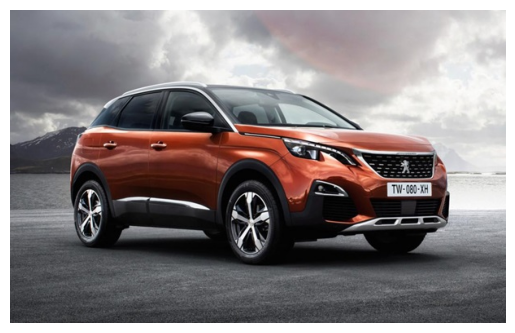

In [10]:
import cv2
from matplotlib import pyplot as plt


def displayImage(image, color_option=None):
    plt.axis('off')
    plt.imshow(image, color_option)


image_path = '../03.jpg'

bgr_image = cv2.imread(image_path, 1)

source_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

source_shape = source_image.shape

print('shape ==> ', source_shape)

displayImage(source_image)

Image resizing with percent size parameter.

shape ==>  (192, 305, 3)


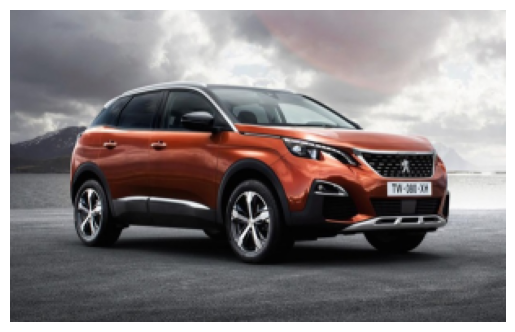

In [11]:
percent = 50

percent_height = int(source_shape[0] * (percent / 100))
percent_width = int(source_shape[1] * (percent / 100))

dim = (percent_width, percent_height)

resized_with_percent = cv2.resize(source_image.copy(), dim, interpolation = cv2.INTER_AREA)

print('shape ==> ', resized_with_percent.shape)

displayImage(resized_with_percent)